In [18]:
# Linear Regression in  Tensorflow


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
rng = np.random


In [19]:

# Parameters 

learning_rate = 0.01 
training_epochs = 10000
display_step = 50





In [20]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [21]:
# Tf Graph input 

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights 


W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")




In [22]:
# Konstruowanie modelu liniowego

pred = tf.add(tf.multiply(X, W), b)


In [23]:
# Średnia kwadratów reszt

cost = tf.reduce_sum(tf.pow(pred -Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)




In [24]:
# Initialize all variables
# Assing their default value

init = tf.global_variables_initializer()

Epoch: 0050 cost= 9.164610863 W= 0.762154 b= 1.71104
Epoch: 0100 cost= 9.148989677 W= 0.7763 b= 1.60928
Epoch: 0150 cost= 9.135457039 W= 0.789605 b= 1.51357
Epoch: 0200 cost= 9.123772621 W= 0.802118 b= 1.42355
Epoch: 0250 cost= 9.113695145 W= 0.813887 b= 1.33889
Epoch: 0300 cost= 9.105023384 W= 0.824956 b= 1.25925
Epoch: 0350 cost= 9.097590446 W= 0.835367 b= 1.18436
Epoch: 0400 cost= 9.091238022 W= 0.845158 b= 1.11392
Epoch: 0450 cost= 9.085815430 W= 0.854367 b= 1.04767
Epoch: 0500 cost= 9.081218719 W= 0.863029 b= 0.985361
Epoch: 0550 cost= 9.077330589 W= 0.871175 b= 0.926756
Epoch: 0600 cost= 9.074061394 W= 0.878837 b= 0.871639
Epoch: 0650 cost= 9.071329117 W= 0.886043 b= 0.819798
Epoch: 0700 cost= 9.069068909 W= 0.892821 b= 0.771041
Epoch: 0750 cost= 9.067207336 W= 0.899195 b= 0.725183
Epoch: 0800 cost= 9.065691948 W= 0.90519 b= 0.682054
Epoch: 0850 cost= 9.064480782 W= 0.910829 b= 0.641488
Epoch: 0900 cost= 9.063529968 W= 0.916133 b= 0.603334
Epoch: 0950 cost= 9.062798500 W= 0.92112

Epoch: 7500 cost= 9.072425842 W= 0.999974 b= 0.000185074
Epoch: 7550 cost= 9.072426796 W= 0.999976 b= 0.000173554
Epoch: 7600 cost= 9.072422028 W= 0.999977 b= 0.000163155
Epoch: 7650 cost= 9.072419167 W= 0.999978 b= 0.000153794
Epoch: 7700 cost= 9.072425842 W= 0.99998 b= 0.000144722
Epoch: 7750 cost= 9.072430611 W= 0.999981 b= 0.000135664
Epoch: 7800 cost= 9.072422981 W= 0.999982 b= 0.000127462
Epoch: 7850 cost= 9.072429657 W= 0.999983 b= 0.000119707
Epoch: 7900 cost= 9.072422028 W= 0.999984 b= 0.000112555
Epoch: 7950 cost= 9.072425842 W= 0.999985 b= 0.000106089
Epoch: 8000 cost= 9.072430611 W= 0.999986 b= 9.93699e-05
Epoch: 8050 cost= 9.072426796 W= 0.999987 b= 9.32793e-05
Epoch: 8100 cost= 9.072426796 W= 0.999988 b= 8.78022e-05
Epoch: 8150 cost= 9.072438240 W= 0.999989 b= 8.21587e-05
Epoch: 8200 cost= 9.072436333 W= 0.99999 b= 7.61733e-05
Epoch: 8250 cost= 9.072433472 W= 0.99999 b= 7.08618e-05
Epoch: 8300 cost= 9.072427750 W= 0.999991 b= 6.63891e-05
Epoch: 8350 cost= 9.072429657 W= 0

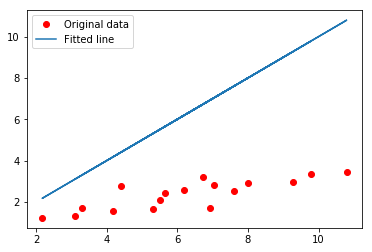

In [25]:
with tf.Session() as sess:
    sess.run(init)
    
    
    # Dopasowanie całego treningowego zestawu danych
    
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict =  {X : x, Y : x})
            
            
        # Wyświetlenie loga dla każdego z kroków :D
        
        if (epoch +1) % display_step == 0:
            c= sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            print("Epoch:", '%04d' %  (epoch+1), "cost=", "{:.9f}".format(c), 
            "W=", sess.run(W), "b=", sess.run(b))
            
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict ={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # Graphic display
    
    plt.plot(train_X, train_Y, 'ro', label= 'Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()